In [98]:
import json
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Ark 6

In [86]:
# ARK 6 Version
def addNoiseToBenchmark(infilename, outfilename, mu, sigma):
    with open(infilename) as json_file:
        data = json.load(json_file)
        newjson = {}

        for i, item in enumerate(data):
            if i > 20:
                break
            accuracy = data[item]["val_acc"][0]
#             accuracy = accuracy + random.gauss(mu, sigma)
            newjson[item] = {}
            newjson[item]['val_acc'] = [1]
            newjson[item]['val_acc'][0] = accuracy

        with open(outfilename, 'w') as outfile:
            json.dump(newjson, outfile)
            
random.seed(1234)
mu = 0; sigma = 0.1
infilename = "../../Benchmarks/ark6/ark6.json"
# outfilename = "../../Benchmarks/ark6/ark6_noisy_mu=" + str(mu) + "_sigma=" + str(sigma) + ".json"
outfilename = "../../Benchmarks/ark6/ark6_minimal_subset.json"
addNoiseToBenchmark(infilename, outfilename, mu, sigma)

{'test_acc': 69.18, 'MMACs': 128.38, 'val_acc': 69.42, 'Params': 2590372}


TypeError: 'float' object is not subscriptable

In [93]:
def readBench(infilename):
    with open(infilename) as json_file:
        data = json.load(json_file)
        myDict = {}
        myList = [0] * len(data)
        for i, item in enumerate(data):
            accuracy = data[item]["val_acc"][0]
            myDict[item] = accuracy
            myList[i] = accuracy
        
        return myDict, myList
    
ark6Dict, ark6List = readBench("../../Benchmarks/ark6/ark6_minimal.json")
ark6DictNoisy, ark6ListNoisy = readBench("../../Benchmarks/ark6/ark6_noisy_mu=0_sigma=0.1.json")

# Ark 7

## Function for adding noise or getting a subset

In [146]:
# ARK 7 Version
def addNoiseToBenchmark(infilename, outfilename, sigma=0, subset=1):
    random.seed(1234)
    with open(infilename) as json_file:
        data = json.load(json_file)
        newjson = {}

        for i, item in enumerate(data):
#             print(data[item])
            if random.random() > subset:
                continue
            accuracy = data[item]["val_acc"]
            MMACs = data[item]["MMACs"]
            accuracy = accuracy + random.gauss(0, sigma)
            newjson[item] = {}
            newjson[item]['val_acc'] = accuracy
            newjson[item]['MMACs'] = MMACs

        with open(outfilename, 'w') as outfile:
            json.dump(newjson, outfile)
            
            

In [141]:
infilename = "../../Benchmarks/ark7/ark7_original.json"

Add noise

In [148]:
sigma = 2
outfilename = "../../Benchmarks/ark7/ark7_MO_noisy_sigma=" + str(sigma) + ".json"
addNoiseToBenchmark(infilename, outfilename, sigma=sigma)

Get only subset

In [129]:
outfilename = "../../Benchmarks/ark7/ark7_MO_subset_0.01.json"
addNoiseToBenchmark(infilename, outfilename, subset=0.01)

## Read benchmark (for plots)

In [176]:
def readBench(infilename, readMMACs=False):
    with open(infilename) as json_file:
        data = json.load(json_file)
        myDict = {}
        myList = [0] * len(data)
        myList2 = [0] * len(data)
        for i, item in enumerate(data):
            accuracy = data[item]["val_acc"]
            mmacs = 0
            if readMMACs: mmacs = data[item]["MMACs"]
            myList2[i] = mmacs
            myDict[item] = (accuracy, mmacs)
            myList[i] = accuracy
        
        return myDict, myList, myList2
    

In [109]:
ark7Dict, ark7List = readBench("../../Benchmarks/ark7/ark7.json")
ark7Noisy05Dict, ark7Noisy05List = readBench("../../Benchmarks/ark7/ark7_MO_noisy_mu=0_sigma=0.5.json")
ark7Noisy1Dict, ark7Noisy1List = readBench("../../Benchmarks/ark7/ark7_MO_noisy_mu=0_sigma=1.json")
ark7Noisy2Dict, ark7Noisy2List = readBench("../../Benchmarks/ark7/ark7_MO_noisy_mu=0_sigma=2.json")

# ark7DictNoisy, ark7ListNoisy = readBench("../../Benchmarks/ark7/ark7_noisy_mu=0_sigma=0.1.json")

## Plots

### Distribution of dataset

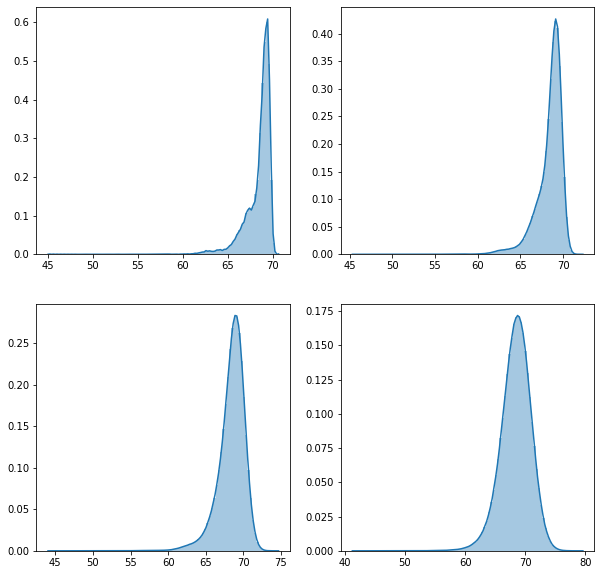

In [122]:
# plt.figure(figsize=(10,10))
fig, a = plt.subplots(2,2, figsize=(10,10))
sns.distplot(ark7List, bins=100, ax=a[0][0])
sns.distplot(ark7Noisy05List, bins=100, ax=a[0][1])
sns.distplot(ark7Noisy1List, bins=100, ax=a[1][0])
sns.distplot(ark7Noisy2List, bins=100, ax=a[1][1])
    


### Scatterplot of Accuracy vs MMACs

In [171]:
ark7MODict, ark7MOListValAcc, ark7MOListMMACs = readBench("../../Benchmarks/ark7/ark7_MO_subset_0.01.json", readMMACs=True)
ark7Dict, ark7ListValAcc, ark7ListMMACs = readBench("../../Benchmarks/ark7/ark7_MO.json", readMMACs=True)

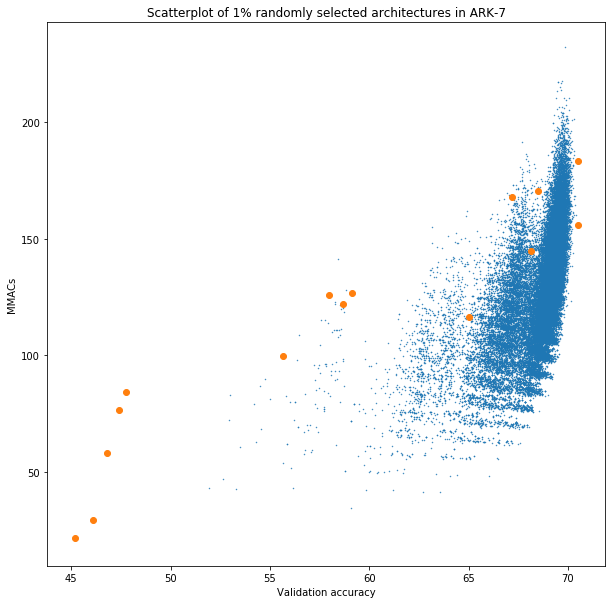

In [194]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(ark7MOListValAcc, ark7MOListMMACs, 0.2)
plt.xlabel("Validation accuracy")
plt.ylabel("MMACs")
plt.title("Scatterplot of 1% randomly selected architectures in ARK-7")

X = []
Y = []

# print(ark7MODict.keys())

with open ("../../Benchmarks/ark7/analysis.json") as json_file:
    data = json.load(json_file)
#     print(data)
#     print(data["optima"])
    optima = data["optima"]
    for i in optima:
        genotype = optima[i]["genotypes"][0]
        genotype = fillWithChar(genotype, 14, "I")
        genotype = replaceChar(genotype, "0", "I")
        X.append(ark7Dict[genotype][0])
        Y.append(ark7Dict[genotype][1])

ax1.scatter(X, Y)

In [185]:
def fillWithChar (string, totalchars, char):
    for i in range(totalchars - len(string)):
        string += char
    return string

def replaceChar (string, target, new):
    newstring = ""
    for i in range(len(string)):
        if string[i] == target:
            newstring += new
        else:
            newstring += string[i]
    return newstring